Importing Libraries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Mounting google drive:

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading dataset:

In [ ]:
data = pd.read_csv('/content/drive/My Drive/ICT_DSA/TCS/webmd.csv')

Rows and columns of dataset:


In [ ]:
data.shape

(362806, 12)

Datatypes of dataset:


In [ ]:
data.dtypes

Age              object
Condition        object
Date             object
Drug             object
DrugId            int64
EaseofUse         int64
Effectiveness     int64
Reviews          object
Satisfaction      int64
Sex              object
Sides            object
UsefulCount       int64
dtype: object

Attribute details of dataset:

In [ ]:
data.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

Major 5 information regarding the dataset:

In [ ]:
data.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


First 5 content of the dataset:

In [ ]:
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,01-06-2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


Last 5 content of the dataset:

In [ ]:
data.tail()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362802,,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,,"Nausea , headache , vomiting , drowsiness, g...",16
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1
362805,45-54,Stop Smoking,11-12-2008,chantix,144470,4,5,"One year ago, I tried Chantix and had to stop ...",5,Female,"Nausea , headache , vomiting , drowsiness, g...",3


Total data set information  of the dataset:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


Checking for null values:

In [ ]:
data.isna().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

Histogram of numerical values:

In [ ]:
data.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [ ]:
data.shape

(362806, 12)

Filling the missing fields of Age, Side and Sex :


In [ ]:
data['Age'] = data['Age'].fillna(data['Age'].mode()[0])


In [ ]:
data['Sides'] = data['Sides'].fillna(data['Sides'].mode()[0])

In [ ]:
data['Sex'] = data['Sex'].fillna(data['Sex'].mode()[0])

In [ ]:
#discarding the Review field
data=data.drop(['Reviews'],axis=1)

Row, Columns after dropping some irrelevant attributes:


In [ ]:
data.shape

(362806, 11)

In [ ]:
data.isna().sum()

Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

Missing values are handled. Data is cleaned:

In [ ]:
#Deriving day,month,year  from Date

In [ ]:
# Convert Start_Time and End_Time to datetypes
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
# df_full_data['End_Time'] = pd.to_datetime(df_full_data['End_Time'], errors='coerce')

# Extract year, month, day, hour and weekday
data['Year']=data['Date'].dt.year
data['Month']=data['Date'].dt.strftime('%b')
data['Day']=data['Date'].dt.day
data['Hour']=data['Date'].dt.hour
data['Weekday']=data['Date'].dt.strftime('%a')

In [ ]:
#Check the Effectiveness count

In [ ]:
print(data["Effectiveness"].value_counts())

5     130388
4      81821
3      60406
1      59387
2      30801
6          2
10         1
Name: Effectiveness, dtype: int64


# Outlier detection

Printing the values of numerical columns

In [ ]:
numeric_col1= ['DrugId']

Printing the boxplot of these numerical columns

Text(0.5, 1.0, 'Boxplot of  DrugId')

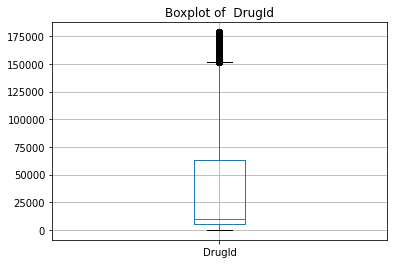

In [ ]:
data.boxplot(numeric_col1)
plt.title('Boxplot of  DrugId')

In [ ]:
numeric_col2= [ 'EaseofUse','Satisfaction', 'UsefulCount']

Text(0.5, 1.0, 'Boxplot of  EaseofUse, Satisfaction, UsefulCount')

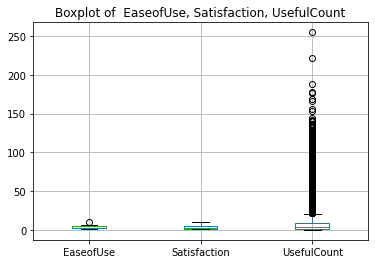

In [ ]:
data.boxplot(numeric_col2)
plt.title('Boxplot of  EaseofUse, Satisfaction, UsefulCount')

It is clear that DrugId and UsefulCount has outliers and has to be processed

In [ ]:
numeric_col3= [ 'EaseofUse']

Text(0.5, 1.0, 'Boxplot of  EaseofUse')

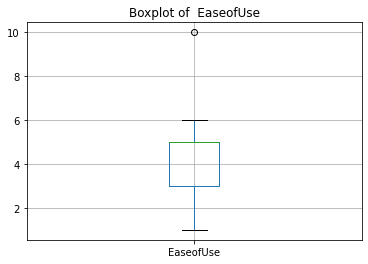

In [ ]:
data.boxplot(numeric_col3)
plt.title('Boxplot of  EaseofUse')

It is clear that UsefulCount has outliers and has to be processed

Loop for outlier removal

In [ ]:
numeric_col= ['DrugId','UsefulCount','EaseofUse']

4896.0
9548.0
63522.0
1.85
Outlier Lower Limit :  -103562.1
Outlier Upper Limit:  171980.1
1319
Outlier :  [177356, 174715, 172530, 175765, 174001, 174001, 174001, 174001, 174188, 175966, 175333, 175333, 175333, 175333, 172305, 172305, 172305, 172305, 172305, 172305, 172305, 178044, 178017, 174586, 174586, 174586, 176509, 176509, 176509, 174491, 174491, 174491, 174491, 174491, 174491, 174491, 174491, 174491, 174491, 174491, 174491, 174491, 174491, 174491, 174491, 174491, 174491, 174491, 174491, 174491, 174491, 174491, 174491, 174491, 174491, 174491, 174491, 174491, 174491, 174491, 174491, 174491, 174491, 174491, 174491, 174491, 173919, 173919, 176468, 176468, 175715, 175715, 175715, 175715, 175715, 175715, 175715, 175715, 175715, 175715, 175715, 175715, 175715, 175715, 175715, 175715, 175715, 175715, 175715, 175715, 175715, 175715, 175715, 175715, 175715, 175715, 175715, 175715, 175715, 175715, 175715, 175715, 175715, 175715, 175715, 175715, 175715, 175715, 175715, 175715, 175715, 1757

(359119, 16)

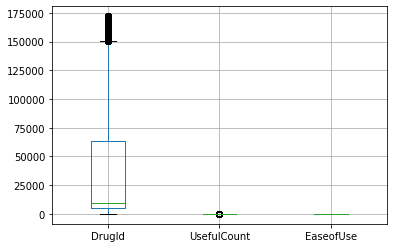

In [ ]:
#To find outlier in DrugId,UsefulCount column
for y in numeric_col:
    #Calculating Q1, Q2, Q3 values
    Q1=np.percentile(data[y],25,interpolation='midpoint')
    Q2=np.percentile(data[y],50,interpolation='midpoint')
    Q3=np.percentile(data[y],75,interpolation='midpoint')
    print(Q1)
    print(Q2)
    print(Q3)
    if(y =="DrugId"):
       limit=1.85
    if(y =="UsefulCount"):
       limit=5
    if(y =='EaseofUse'):
       limit=1.5
    print(limit)
    #Calculating IQR, lower, upper values
    IQR=Q3-Q1
    low_lim=(Q1-(limit*IQR))
    Up_lim=(Q3+(limit*IQR))
    print("Outlier Lower Limit : ",low_lim)
    print("Outlier Upper Limit: ",Up_lim)
    #Determining the outliers
    outlier=[]
    for x in data[y]:
        if((x>Up_lim) or (x<low_lim)):
            outlier.append(x)
    print(len(outlier))
    print("Outlier : ",outlier)
    #Finding Index of outliers
    index1=data[y]>Up_lim
    ind=[]
    ind=data.loc[index1].index
    print(ind)
    #Removing outliers
    for i in ind:
        data.drop(i,inplace=True)
       
data.boxplot(numeric_col)
data.shape

So I had deleted 1319 + 2367 + 1 = 3687 rows as part of outlier detection.

In [ ]:
#Model creation

In [ ]:
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Satisfaction,Sex,Sides,UsefulCount,Year,Month,Day,Hour,Weekday
0,75 or over,Stuffy Nose,2014-09-21,25dph-7.5peh,146724,5,5,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0,2014,Sep,21,0,Sun
1,25-34,Cold Symptoms,2011-01-13,25dph-7.5peh,146724,5,5,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1,2011,Jan,13,0,Thu
2,65-74,Other,2012-07-16,warfarin (bulk) 100 % powder,144731,2,3,3,Female,,0,2012,Jul,16,0,Mon
3,75 or over,Other,2010-09-23,warfarin (bulk) 100 % powder,144731,2,2,1,Female,,0,2010,Sep,23,0,Thu
4,35-44,Other,2009-01-06,warfarin (bulk) 100 % powder,144731,1,1,1,Male,,1,2009,Jan,6,0,Tue


In [ ]:
categorical_coln= ['Age', 'Condition',  'Drug',  'Sex', 'Sides',
       'Year', 'Month', 'Day', 'Hour', 'Weekday']

#Applying Encoding mechanism

In [ ]:
for y in categorical_coln:
    data[y] = pd. factorize(data[y])[0]

In [ ]:
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Satisfaction,Sex,Sides,UsefulCount,Year,Month,Day,Hour,Weekday
0,0,0,2014-09-21,0,146724,5,5,5,0,0,0,0,0,0,0,0
1,1,1,2011-01-13,0,146724,5,5,5,1,0,1,1,1,1,0,1
2,2,2,2012-07-16,1,144731,2,3,3,1,1,0,2,2,2,0,2
3,0,2,2010-09-23,1,144731,2,2,1,1,1,0,3,0,3,0,1
4,3,2,2009-01-06,1,144731,1,1,1,0,1,1,4,1,4,0,3


In [ ]:
data.shape

(359119, 16)

# Feature Selection

In [ ]:
#Check Heat map,for feature selection

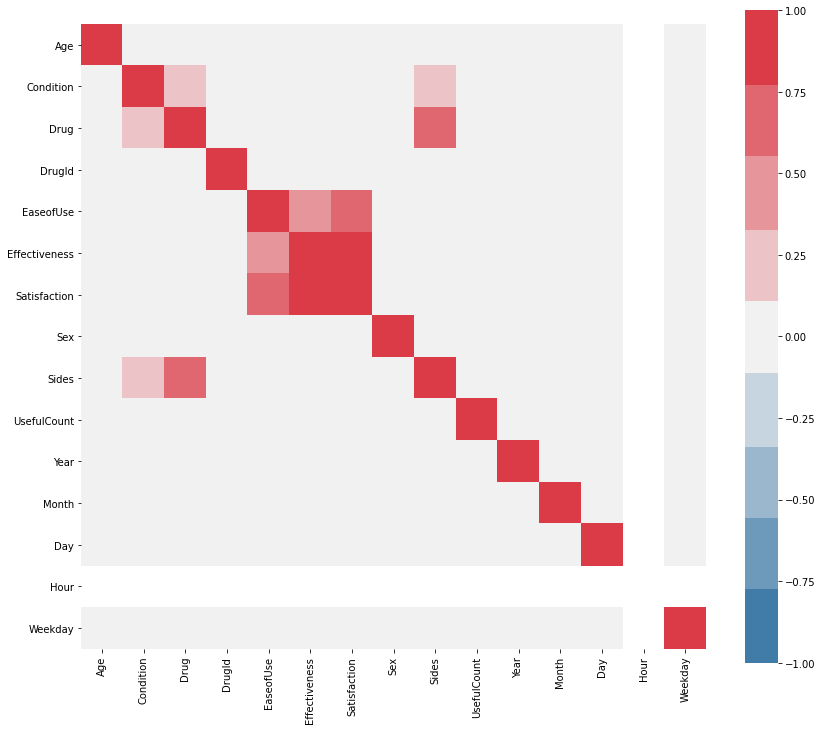

In [ ]:
plt.rcParams['figure.figsize'] = (14,12)
sns.heatmap(data.corr(), vmin=-1, vmax=1, center=0,
            square=True, cmap = sns.diverging_palette(240, 10, n=9))
plt.show()

In [ ]:
cor = data.corr()

#Correlation with output variable
cor_target = abs(cor["Effectiveness"])

#Selecting highly correlated features,setting a cutoff value for corelation
relevant_features = cor_target[cor_target>0.015]
relevant_features

EaseofUse        0.550101
Effectiveness    1.000000
Satisfaction     0.792629
Sex              0.018424
UsefulCount      0.047634
Year             0.017223
Name: Effectiveness, dtype: float64

In [ ]:
data.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Satisfaction', 'Sex', 'Sides', 'UsefulCount', 'Year',
       'Month', 'Day', 'Hour', 'Weekday'],
      dtype='object')

#Selected Features

In [ ]:
sel_features = ['Age', 'Condition',  'Drug',  'EaseofUse','Satisfaction',
        'Effectiveness', 'Sex', 'Sides', 'Year']

#Removing Irrelevant fields

In [ ]:
data1 = data.filter(sel_features, axis=1)

In [ ]:
data1.shape

(359119, 9)

In [ ]:
data1.head()

,Age,Condition,Drug,EaseofUse,Satisfaction,Effectiveness,Sex,Sides,Year
0,0,0,0,5,5,5,0,0,0
1,1,1,0,5,5,5,1,0,1
2,2,2,1,2,3,3,1,1,2
3,0,2,1,2,1,2,1,1,3
4,3,2,1,1,1,1,0,1,4


Writing the Preprocessed data to a file:

# MODEL CREATION

In [ ]:
#Creating train test  model

In [ ]:
from sklearn.model_selection import train_test_split
y = data1['Effectiveness'].values
X = data1.drop('Effectiveness', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(287295, 8)

In [ ]:
#To display result
def dispAcc(y_pred):
  print("Classification Report")
  print(classification_report(y_test,y_pred))
  print("Accuracy is ",accuracy_score(y_test,y_pred))
  print("Precision is ", precision_score(y_test,y_pred,pos_label='positive',
                                           average='micro'))
  print("Recall is ",recall_score(y_test,y_pred,y_pred,pos_label='positive',
                                           average='micro'))
  print("f1 score is ",f1_score(y_test,y_pred,y_pred,pos_label='positive',
                                           average='micro'))
  confusion_matrix(y_test,y_pred)


In [ ]:
#Logistic Regression is Irrelevant for this dataset

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_curve

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [ ]:
print('Random Forest Classifier:')
dispAcc(y_pred)

Random Forest Classifier:
Classification Report
              precision    recall  f1-score   support

           1       0.69      0.83      0.75     11724
           2       0.53      0.42      0.47      6205
           3       0.59      0.58      0.58     11953
           4       0.65      0.61      0.63     16124
           5       0.82      0.83      0.83     25817
           6       1.00      1.00      1.00         1

    accuracy                           0.70     71824
   macro avg       0.71      0.71      0.71     71824
weighted avg       0.70      0.70      0.70     71824

Accuracy is  0.7026202940521274
Precision is  0.7026202940521274
Recall is  0.7471563117297143
f1 score is  0.7436860806156359


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


# Got an accuracy of 70.36%,  and  f1 score of 74.27%,  which is much better than the other models we created.

In [ ]:
rft=RandomForestClassifier(n_estimators=600, max_depth=25, criterion='entropy' )
rft.fit(X_train,y_train)
y_pred=rft.predict(X_test)
print('Random Forest Classifier:')
dispAcc(y_pred)

Random Forest Classifier:
Classification Report
              precision    recall  f1-score   support

           1       0.68      0.86      0.76     11724
           2       0.56      0.41      0.47      6205
           3       0.59      0.60      0.60     11953
           4       0.67      0.61      0.64     16124
           5       0.83      0.83      0.83     25817
           6       1.00      1.00      1.00         1

    accuracy                           0.71     71824
   macro avg       0.72      0.72      0.72     71824
weighted avg       0.71      0.71      0.71     71824

Accuracy is  0.7103335932278904
Precision is  0.7103335932278904
Recall is  0.756120567641194
f1 score is  0.751224579657273


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


# Hyperparameter tuning of RFA had resulted in an improved accuracy of 71.03%,  and  f1 score of 75.12%,  which is much better than the other models we created.